### Диагностирование рака молочной железы в Висконсине

<b>Цель:</b> Определить является ли новообразование в груди злокачественным или нет.

    Признаками  в этом наборе данных являются различные измерения образований в груди, такие как радиус, симметричность, и т.д.
#### Целевая переменная  - диагноз, является ли новообразование злокачественным или нет.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import RocCurveDisplay 

import warnings
warnings.filterwarnings('ignore')

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
try :
    data = pd.read_csv('datasets/data.csv')
except :
    data = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv') 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


<a id='data_preprocessing'></a>
### Предобработка данных

In [5]:
data['Unnamed: 32'].unique()

array([nan])

In [6]:
data.drop(['Unnamed: 32','id'], axis = 1 , inplace=True)

In [7]:
data.columns = data.columns.str.replace(' ', '_')

In [8]:
data.duplicated().sum()

0

In [9]:
data.columns 

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
feature_list = list(data.columns)
feature_list.remove('diagnosis')

<a id='eda'></a>
### Исследовательский анализ данных

#### Статистический анализ

In [11]:
round(data.describe(),2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,...,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08
std,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,...,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02
min,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,...,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,...,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07
50%,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,...,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08
75%,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,...,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,...,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21


#### Гистограммы признаков

In [12]:
def drawHist(feature) :
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    ax1.hist(data[data['diagnosis']=='M'][feature], bins=50, density=True, label = 'M', alpha=0.5)
    ax1.hist(data[data['diagnosis']=='B'][feature], bins=50, density=True, label = 'B', alpha=0.5)
    ax1.set(xlabel=feature, ylabel='proportion', title=feature + ' and diagnosis')
    ax1.legend()
    
    ax2.boxplot(data[data['diagnosis']=='M'][feature])
    ax2.set(xlabel='M', ylabel=feature)
    
    ax3.boxplot(data[data['diagnosis']=='B'][feature])
    ax3.set(xlabel='B',ylabel=feature)
    
    fig.tight_layout()
    plt.show()

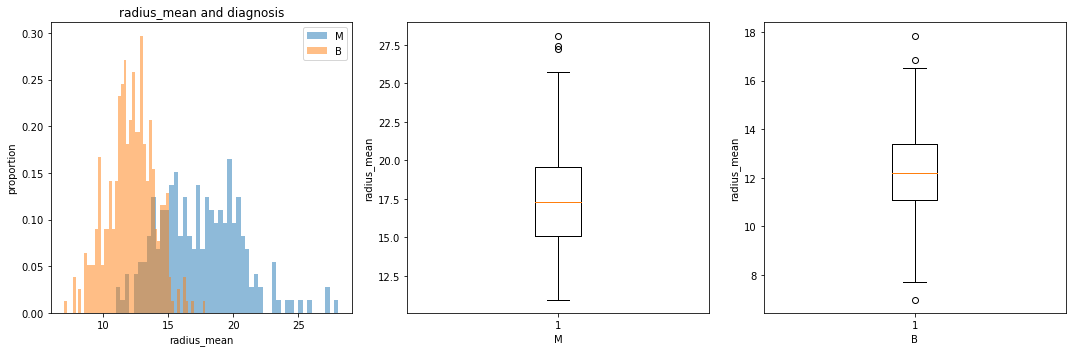

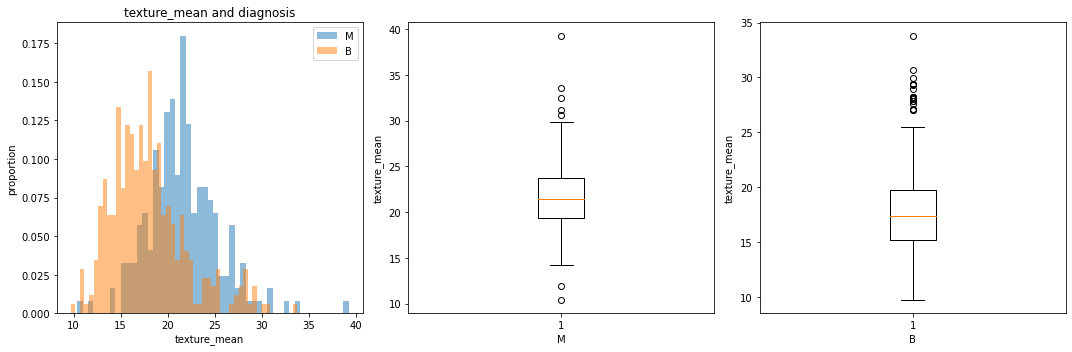

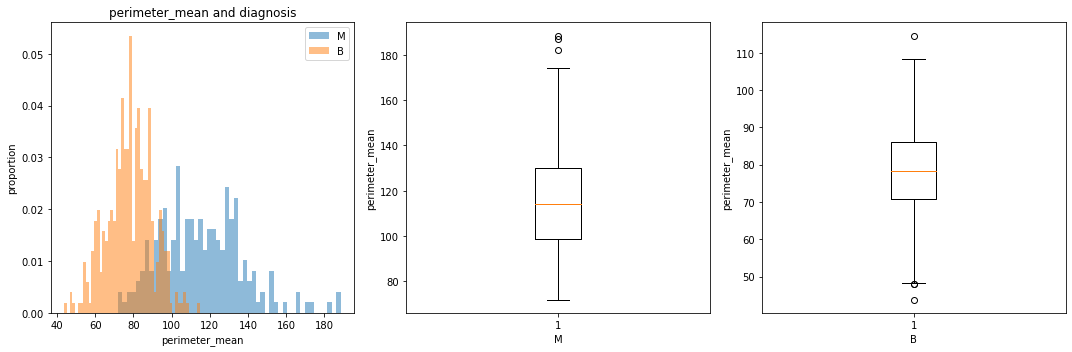

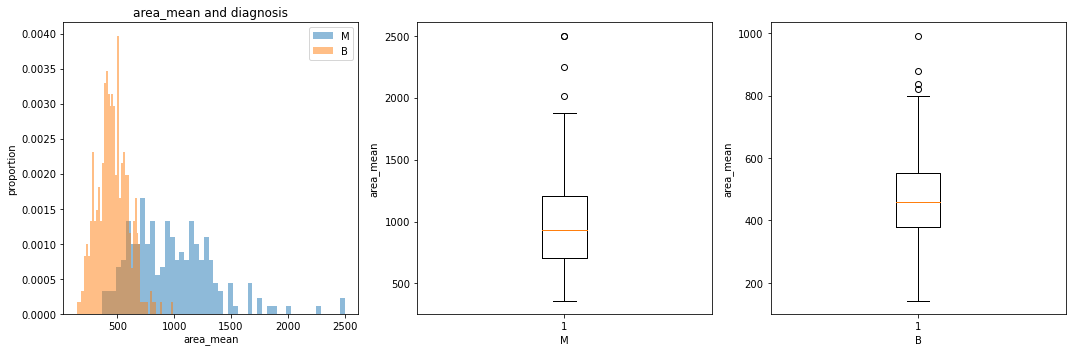

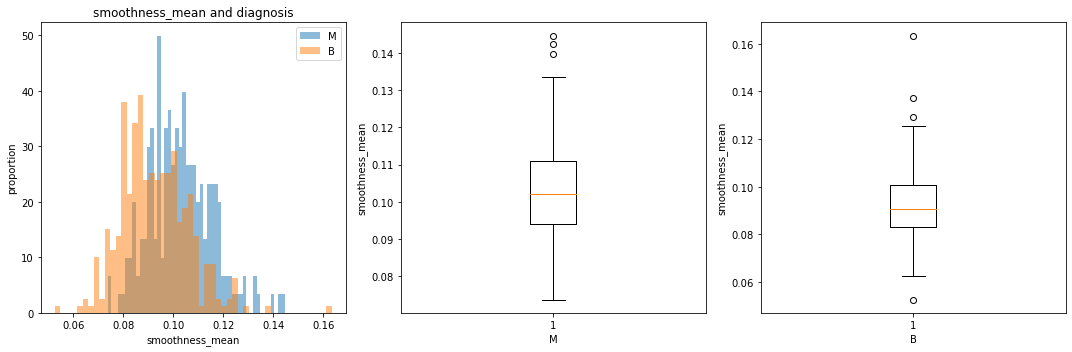

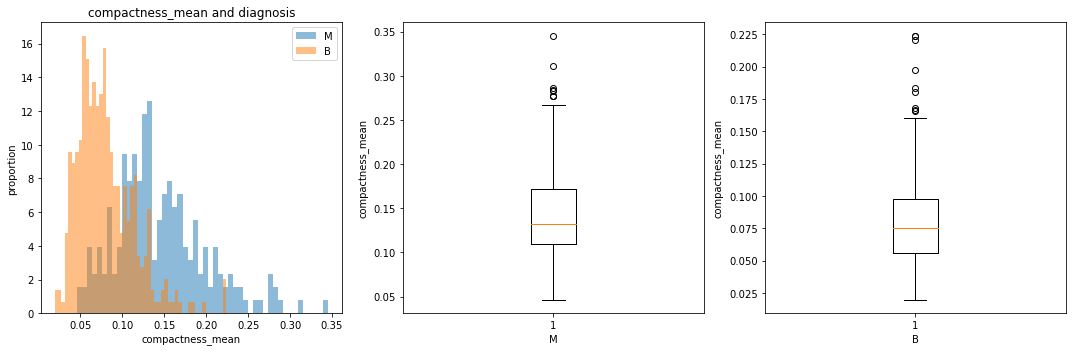

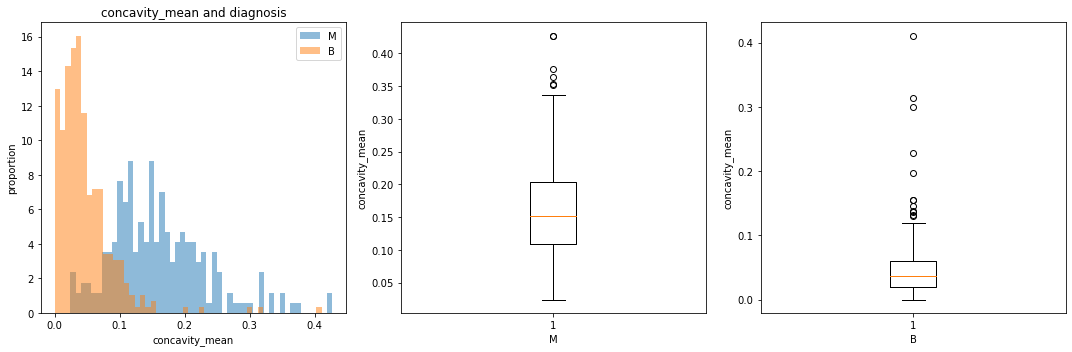

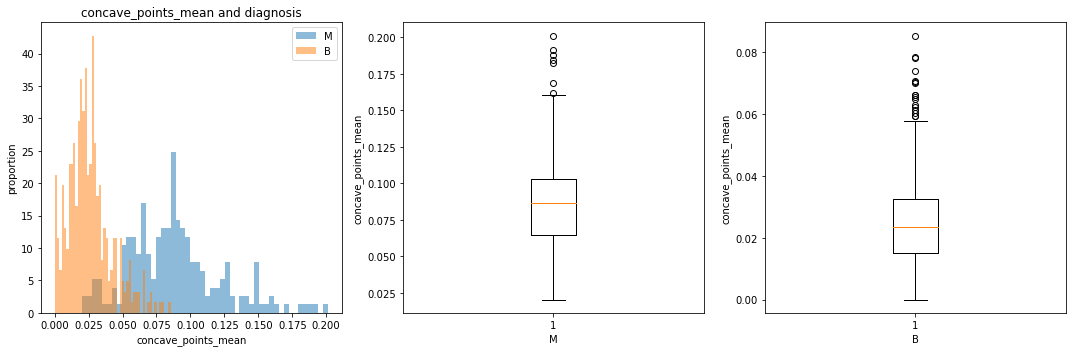

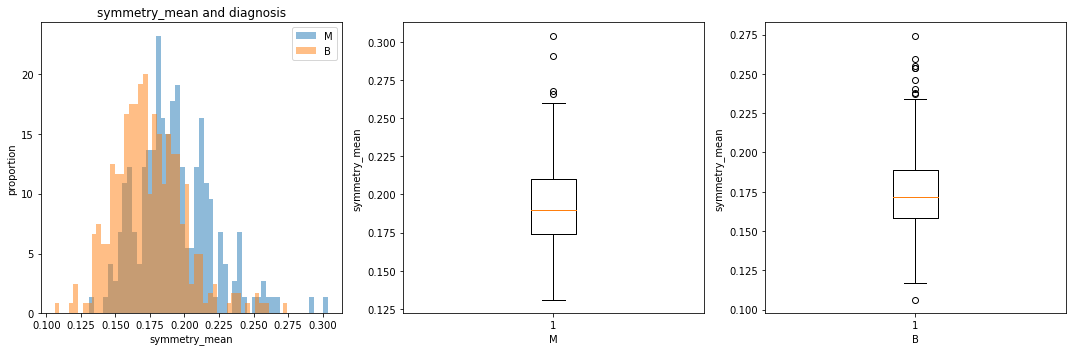

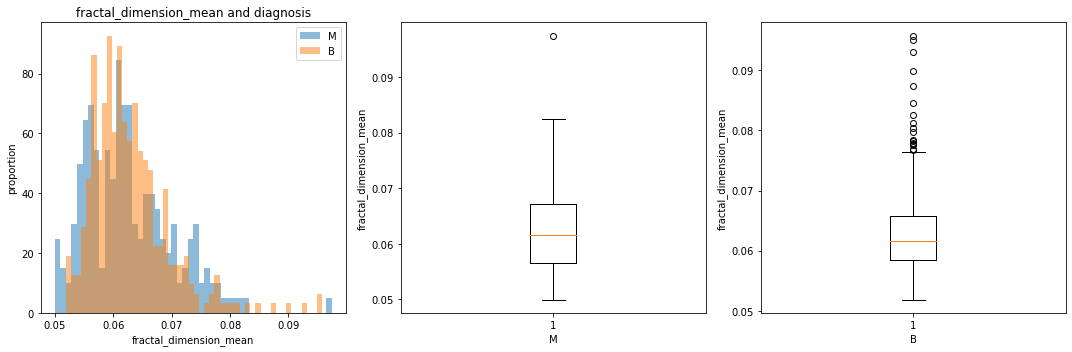

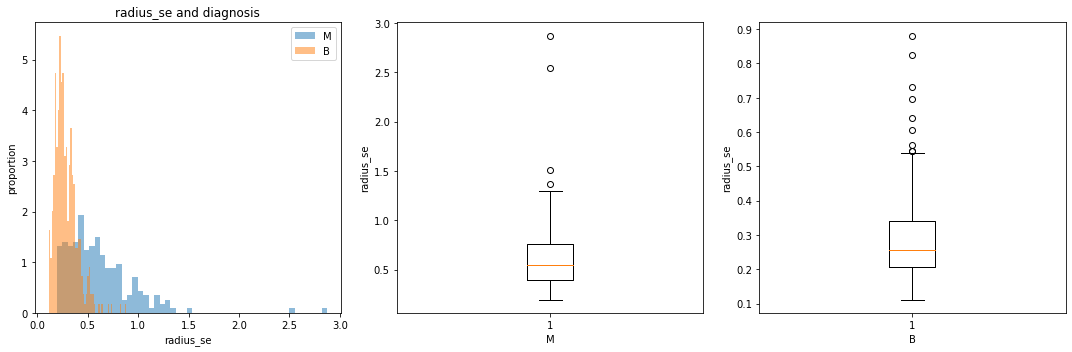

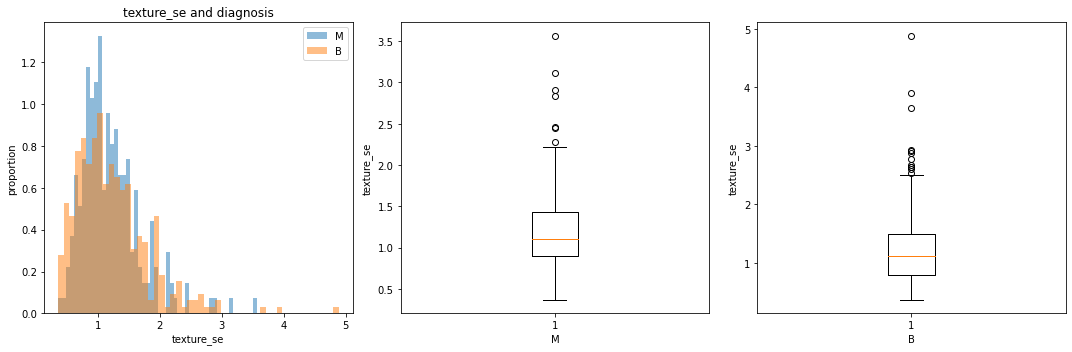

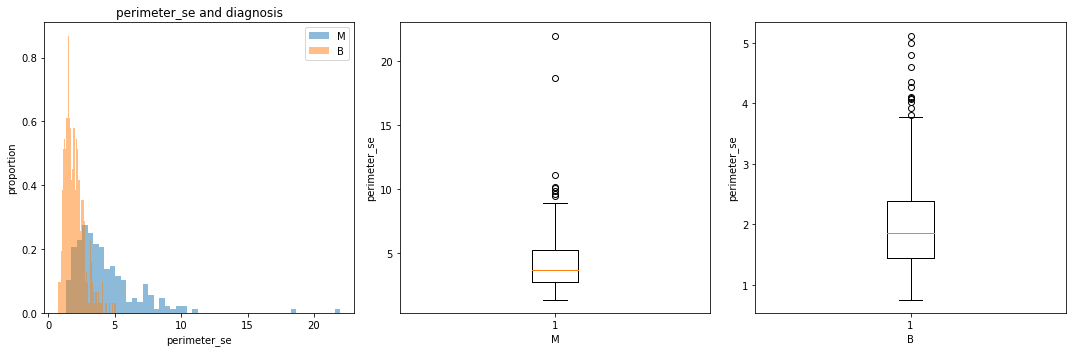

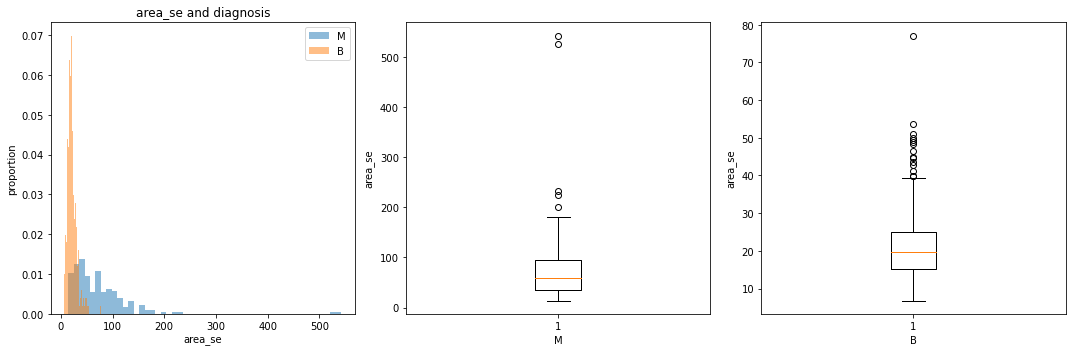

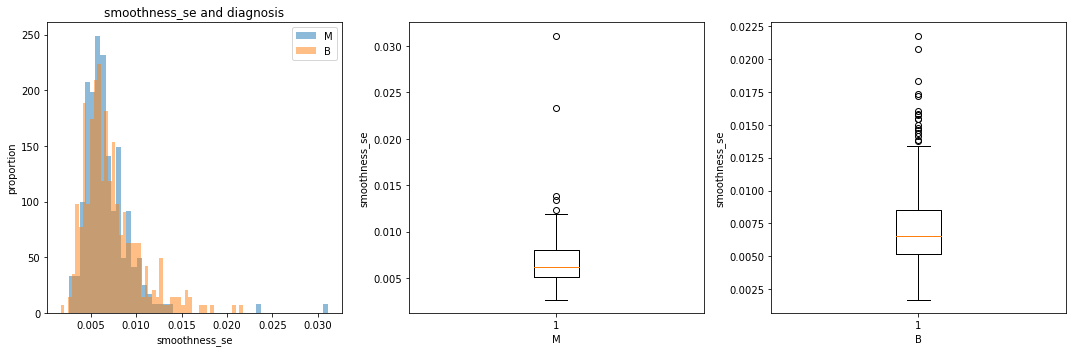

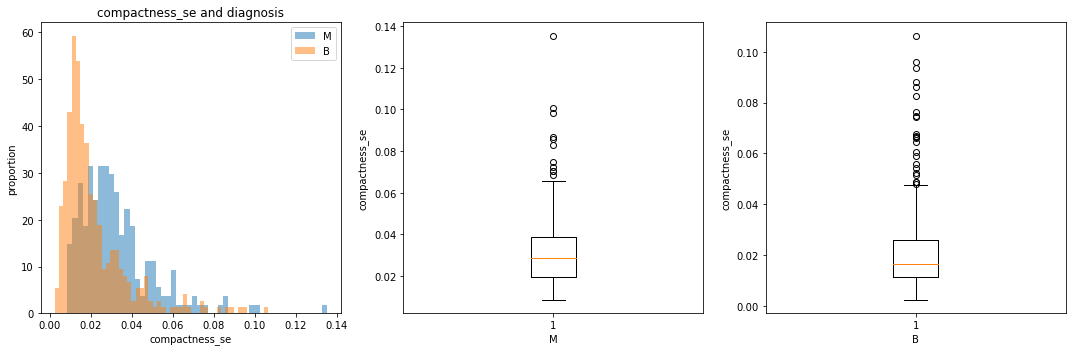

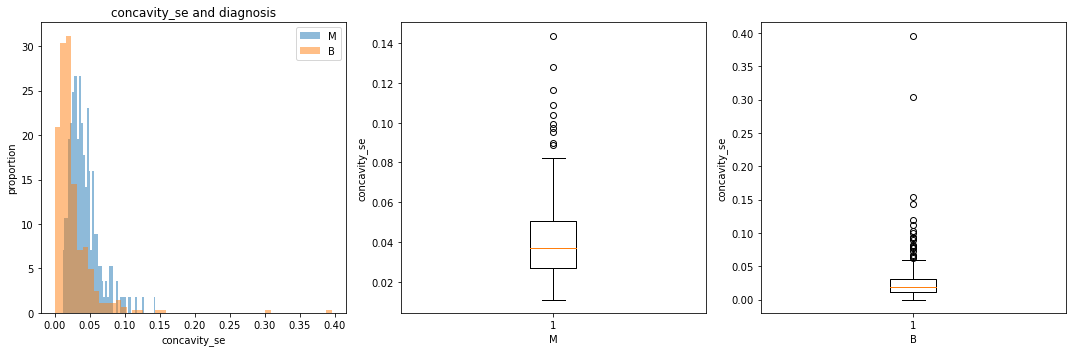

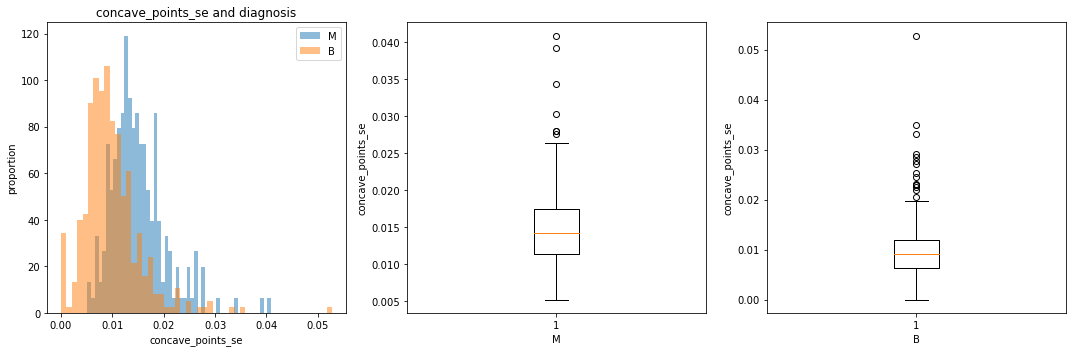

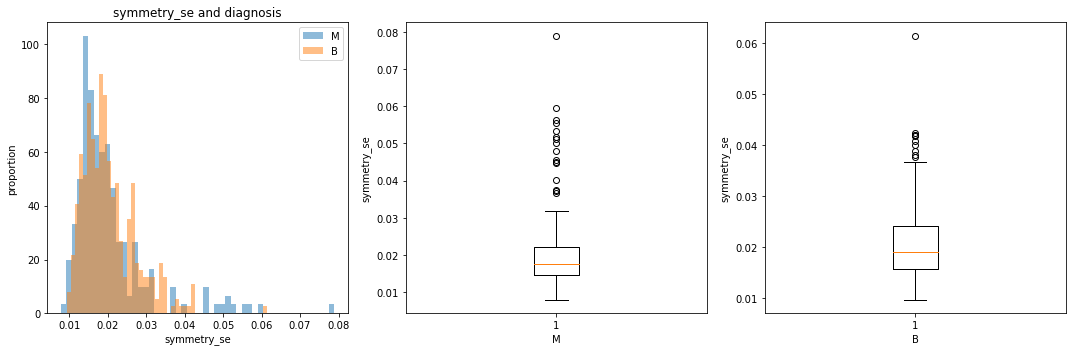

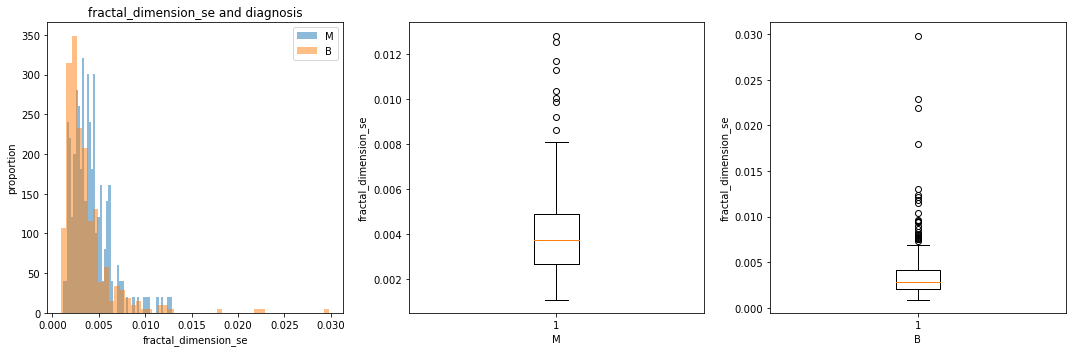

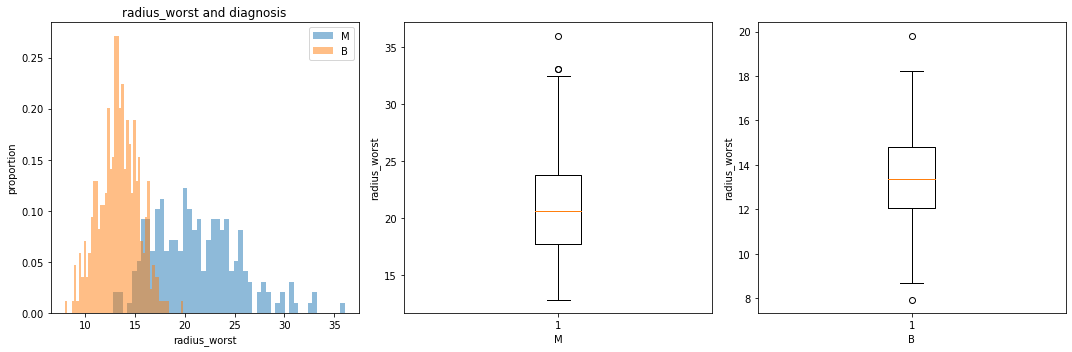

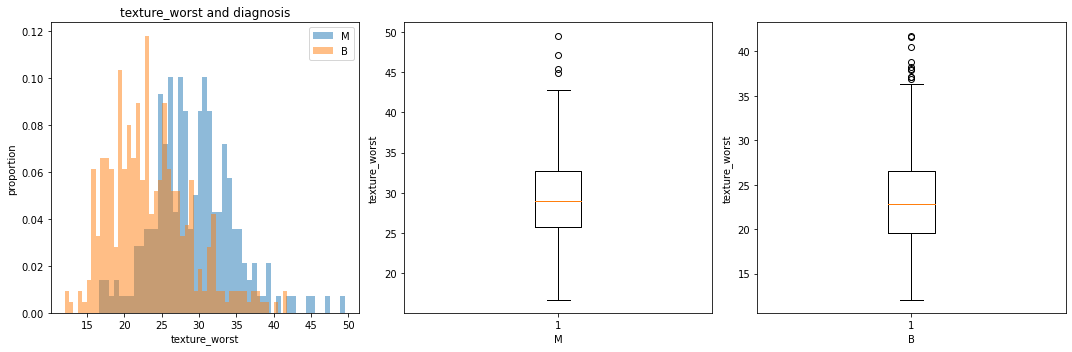

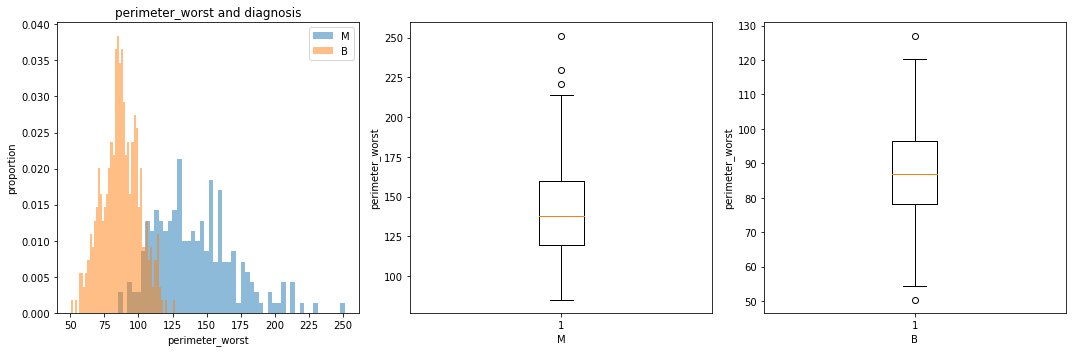

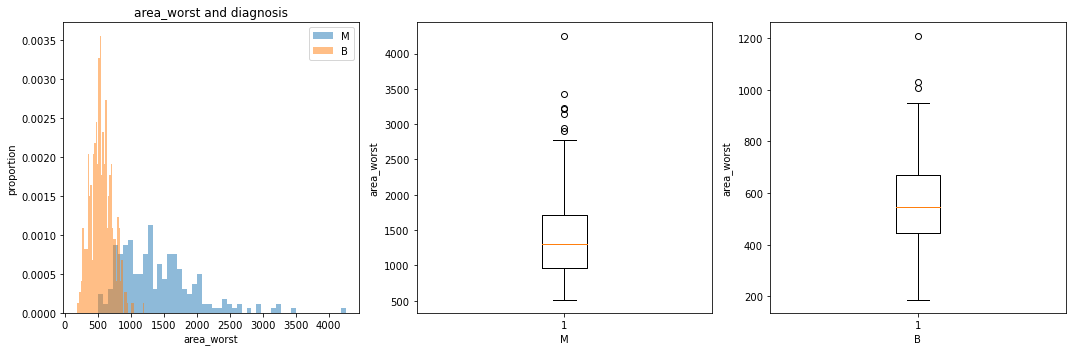

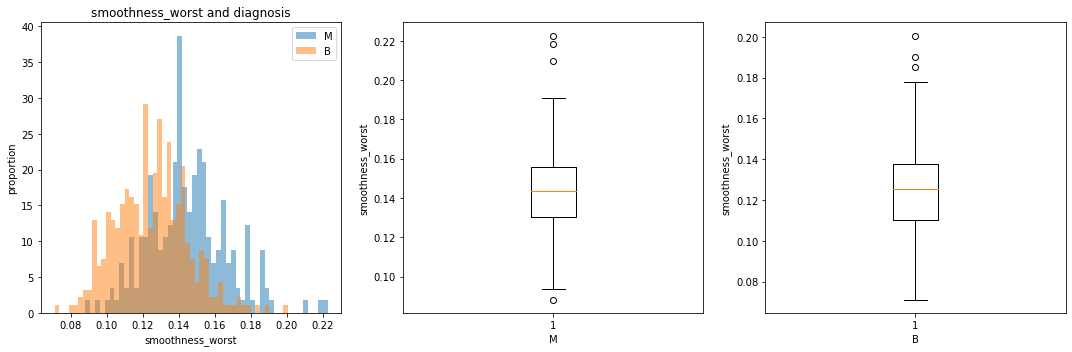

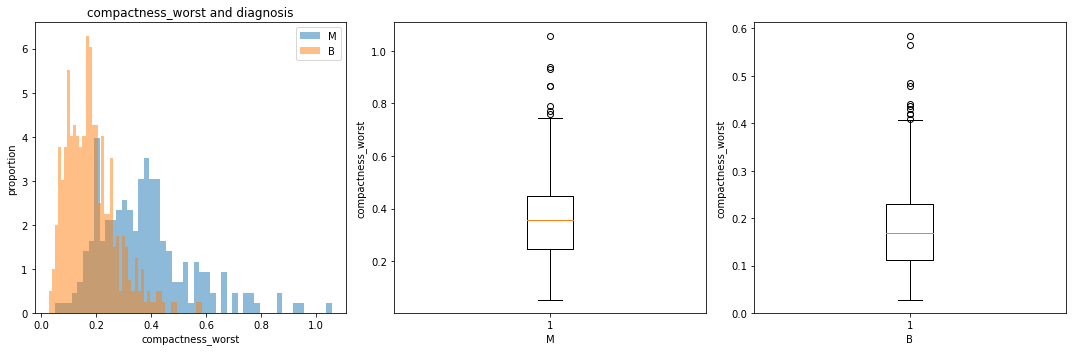

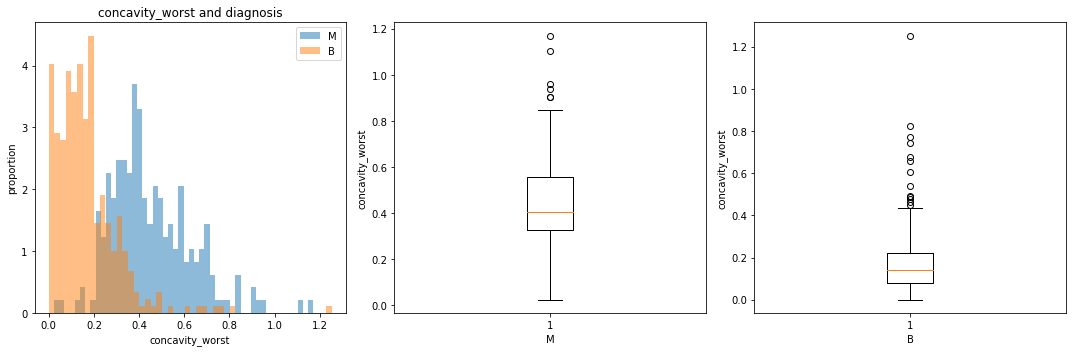

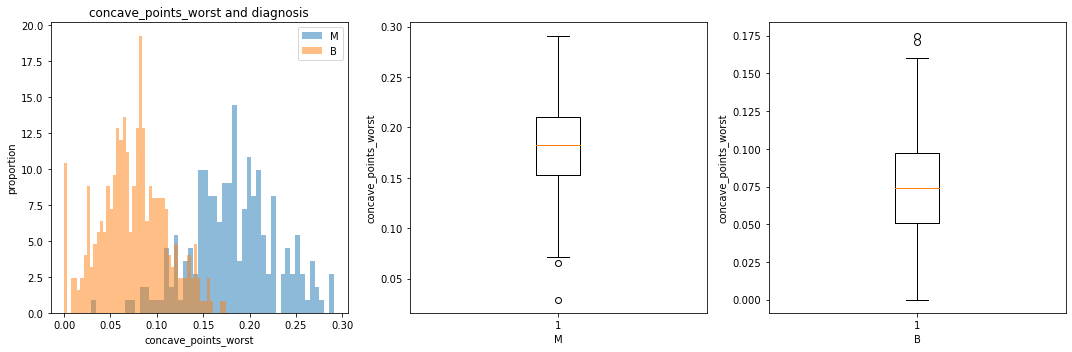

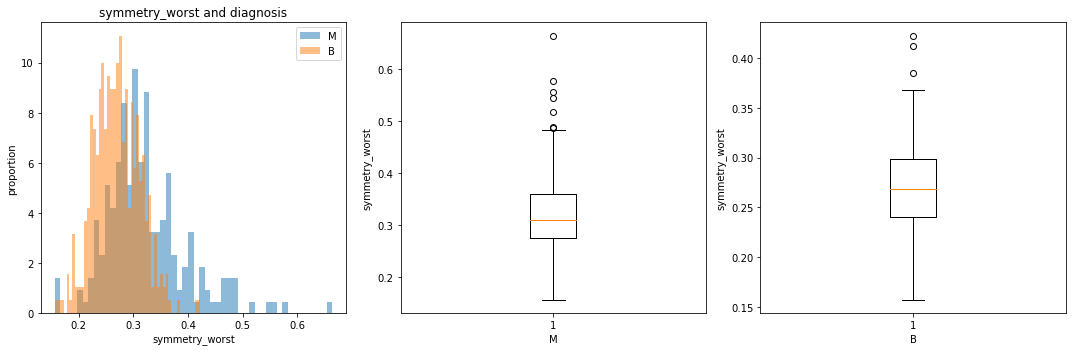

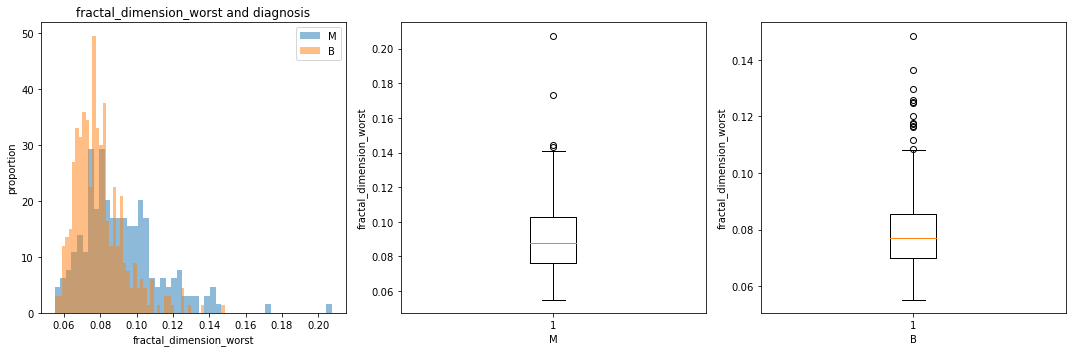

In [13]:
for feature in feature_list :
    drawHist(feature)

    На гистограммах следующих признаков прослеживается граница разделения между
    злокачественными и доброкачественными новообразованиями.
- radius_mean
- perimeter_mean 
- area_mean
- concavity_mean
- concave_points_mean
- radius_se
- perimeter_se
- area_se
- radius_worst
- perimeter_worst 
- area_worst
- concavity_worst
- concave_points_worst

<a id='corr_analysis'></a>
#### Корреляционный анализ

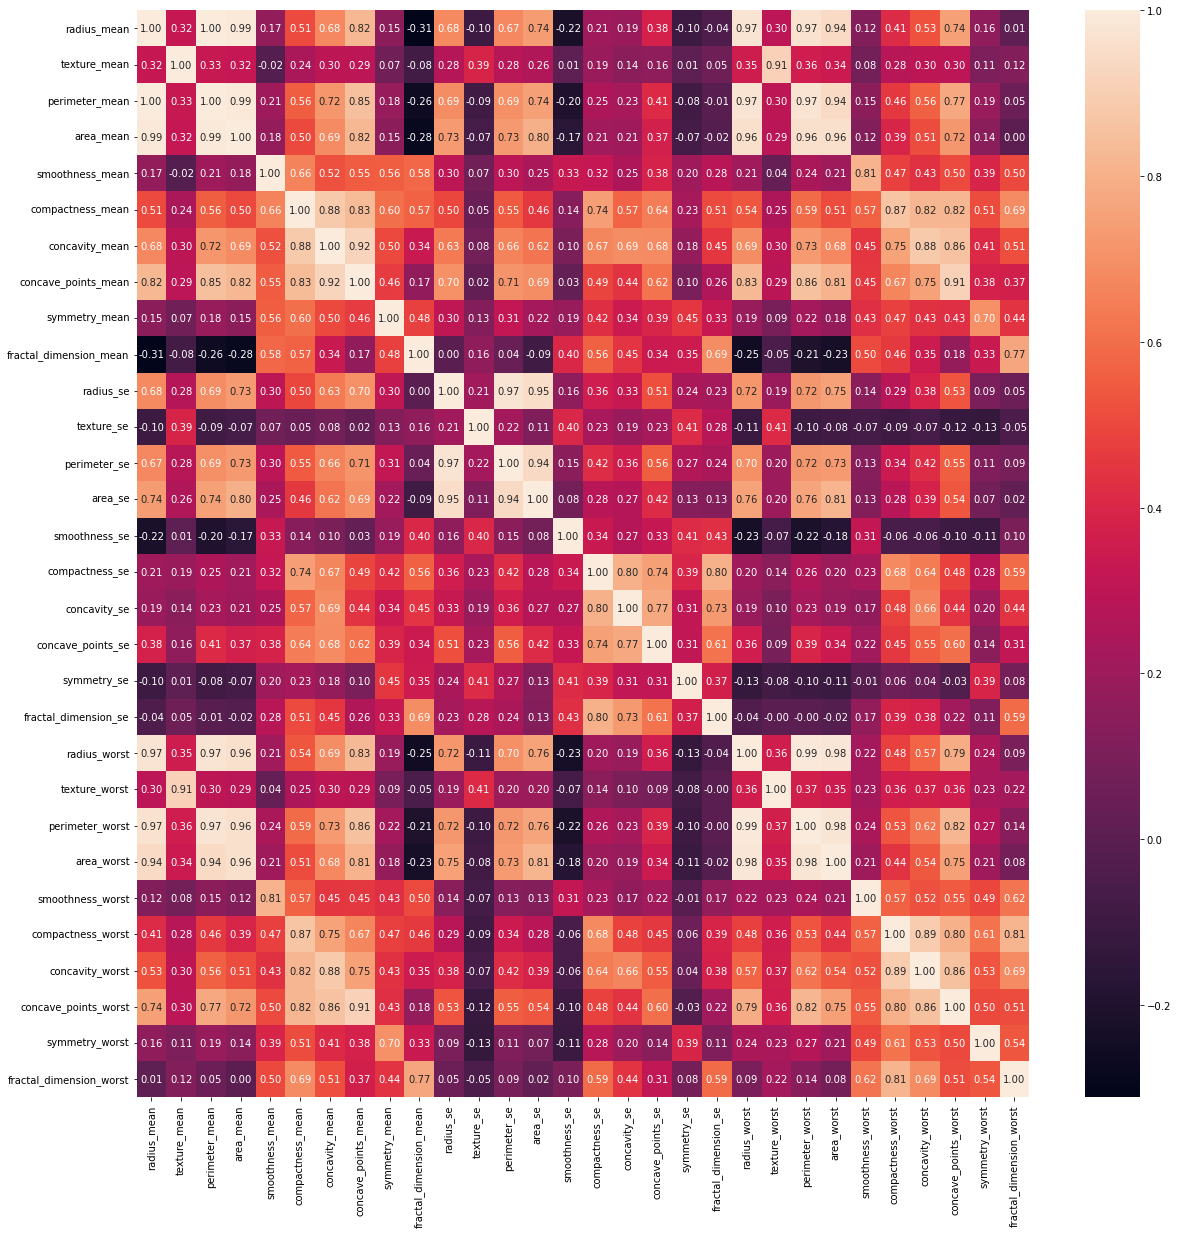

In [14]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.drop(['diagnosis'], axis=1).corr(), annot=True, fmt='.2f') 
plt.show()      

    Есть признаки, между которыми высокая корреляция, больше 0.85.

In [15]:
target_corr = 0.85

df_corr = data.drop(['diagnosis'], axis=1)

features_pairs_bcorr = []
max_corr_names_list = []   

for i, value_i in enumerate(df_corr.columns) :  
    for j, value_j in enumerate(df_corr.columns) :
        
        crr = data[value_i].corr(data[value_j])
        if crr > target_corr :
            if [value_j, value_i] in features_pairs_bcorr:
                pass
            else :
                if value_i != value_j : 
                    features_pairs_bcorr.append([value_i, value_j])

##### Список признаков, которые сильно скоррелированы:

In [16]:
list_i = []
for it in features_pairs_bcorr :
    list_i.append([it[0], it[1], round(data[it[0]].corr(data[it[1]]),2)])   
corr_df = pd.DataFrame(list_i, columns=['1', '2', 'corr']).sort_values(by='corr', ascending=False) 
corr_df

,1,2,corr
0,radius_mean,perimeter_mean,1.00
24,radius_worst,perimeter_worst,0.99
1,radius_mean,area_mean,0.99
6,perimeter_mean,area_mean,0.99
25,radius_worst,area_worst,0.98
26,perimeter_worst,area_worst,0.98
8,perimeter_mean,radius_worst,0.97
9,perimeter_mean,perimeter_worst,0.97
21,radius_se,perimeter_se,0.97
3,radius_mean,perimeter_worst,0.97


#### scatterplot-ы для сильно скоррелированных признаков

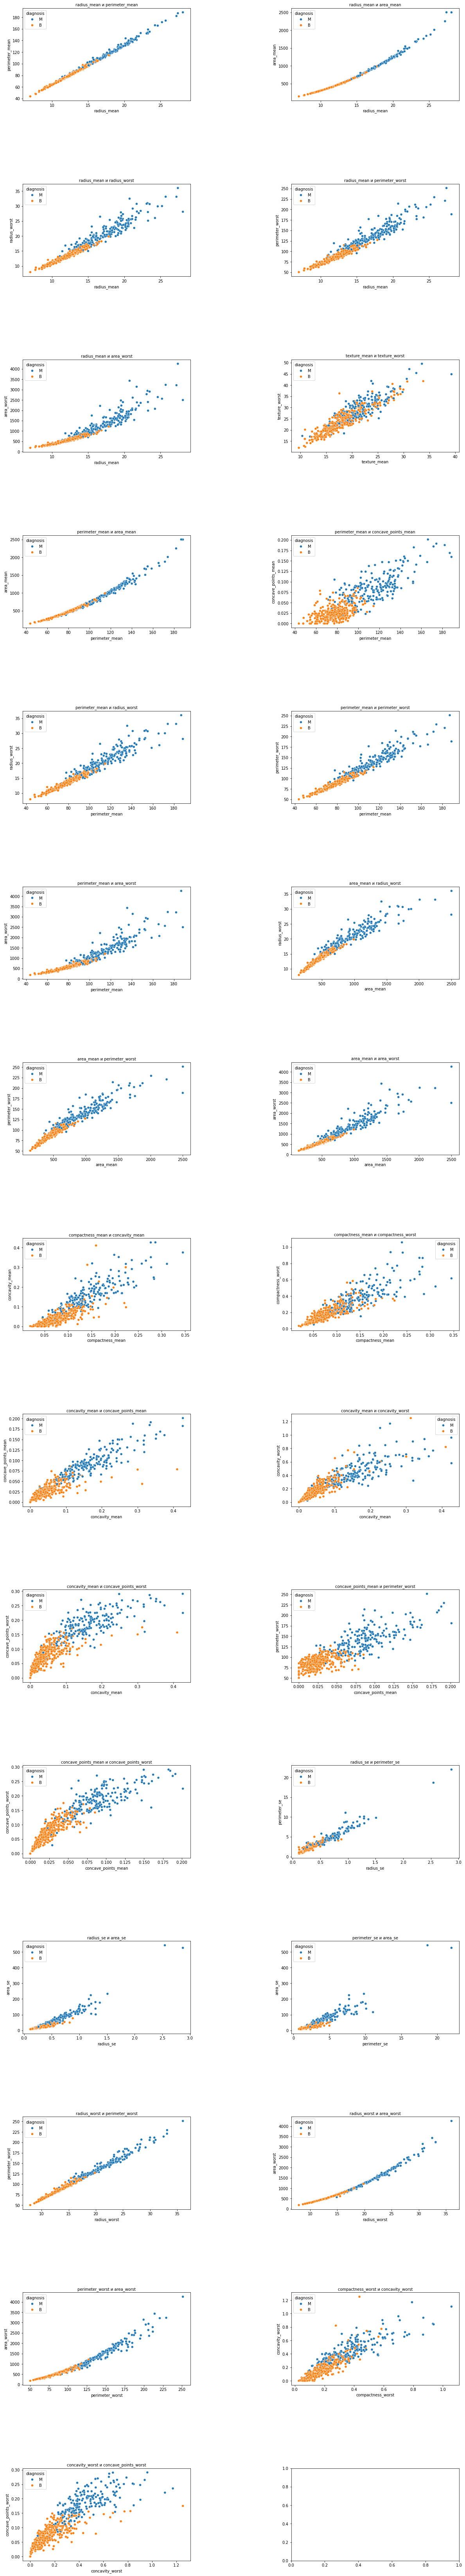

In [17]:
if len(features_pairs_bcorr)%2 == 0 :
    h = len(features_pairs_bcorr)/2
else :
    h = int(len(features_pairs_bcorr)/2)+1

fig, ax = plt.subplots(nrows = h,ncols = 2,figsize = (20,120))
plt.subplots_adjust(wspace=0.6, hspace=0.9)

cur = 1
for pair in features_pairs_bcorr:
    plt.subplot(h,2,cur) 
    f1 = pair[0]
    f2 = pair[1]
    ax = sns.scatterplot(x = f1, y = f2, hue='diagnosis', data = data);
    title = f1 + ' и ' + f2 
    plt.title(title, fontsize=10)
    cur+=1

На рассматриваемых scatterplot данные перемешанны, но похоже,что между ними можно провести прямую, если убрать выбросы, т.е у признаков прослеживается линейная зависимость.

    Убираем один из двух сильно скоррелированных признаков.

In [18]:
good_data = data
list_del = []
for pair in features_pairs_bcorr:
    list_del.append(pair[0])
list_del = set(list_del)  
for dl in list_del:
    good_data=good_data.drop([dl], axis=1)

#### Распределение целевой переменной

diagnosis
B    0.63
M    0.37
Name: proportion, dtype: float64


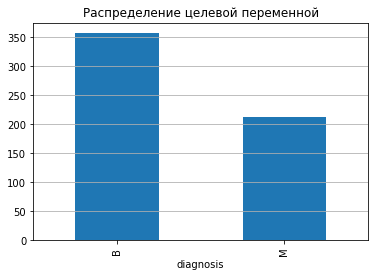

In [19]:
print(round(data['diagnosis'].value_counts(normalize=True),2))

data['diagnosis'].value_counts(normalize=True)
data['diagnosis'].value_counts().plot.bar(figsize=(6, 4))
plt.title('Распределение целевой переменной')
plt.grid(axis='y')

baseline качества равна 63%

##### Перекодируем целевую

In [20]:
data['diagnosis'] = data['diagnosis'].apply(lambda x: 1 if x=='M' else 0)

## Обучение модели

<b>Разделяем данные</b>

In [21]:
# Разделяем данные на тренировочные и тестовые     
X_train, X_test, y_train, y_test = train_test_split(data.drop(['diagnosis'], axis=1),
                                                    data['diagnosis'],
                                                    test_size=0.3,
                                                    random_state=123,
                                                    stratify=data['diagnosis']
)

#### Scaling

    Требуется масштабирование, поскольку некоторые объекты распределены неравномерно.
	- среднее значение radius_mean = 	14.13, 
    - среднее значение area_mean = 654.89	,
    - среднее значение smoothness_mean = 0.10.
    Значения этих объектов находятся в разном масштабе. 
    Для того чтобы модель работала хорошо, нужно масштабировать данные. 

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
def quality_report(prediction, actual):
    print("Accuracy: {:.4f}\nPrecision: {:.4f}\nRecall: {:.4f}\nf1_score: {:.4f}".format(
        accuracy_score(prediction, actual),
        precision_score(prediction, actual),
        recall_score(prediction, actual),
        f1_score(prediction, actual)
    ))

#### KNN  "из коробки" без настройки параметров

In [24]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

probas = knn.predict_proba(X_test_scaled)[:,1]

In [25]:
quality_report(y_pred, y_test)

Accuracy: 0.9591
Precision: 0.9219
Recall: 0.9672
f1_score: 0.9440


ROC-AUC  0.98


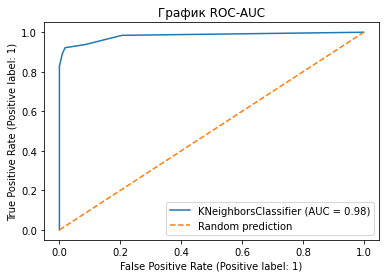

In [26]:
print('ROC-AUC ', round(roc_auc_score(y_test, probas),2))

RocCurveDisplay.from_estimator(knn, X_test_scaled, y_test);

plt.plot([0,1], [0,1], linestyle='dashed', label='Random prediction');
plt.title("График ROC-AUC")
plt.legend()
plt.show()

#### Подбор параметров 

f1 =  0.96


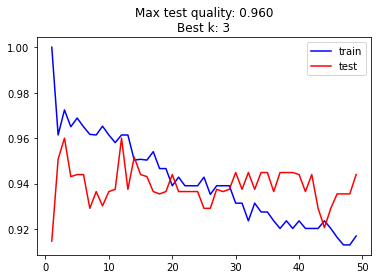

In [27]:
neighbors = range(1, 50)

f1_score_train = []
f1_score_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    f1_score_train.append(f1_score(knn.predict(X_train_scaled), y_train))
    f1_score_test.append(f1_score(knn.predict(X_test_scaled), y_test))
    
plt.plot(neighbors, f1_score_train, color='blue', label='train')
plt.plot(neighbors, f1_score_test, color='red', label='test')
plt.title("Max test quality: {:.3f}\nBest k: {}".format(max(f1_score_test), np.argmax(f1_score_test)+1))
plt.legend();
print('f1 = ', max(f1_score_test))

##### Выводы
##### KNN 'из коробки'
f1 = 0.9440

##### KNN подбор параметров
f1 =  0.96
neighbors: 3

    При подборе параметров метрика F1 у модели KNN с подбором параметров показывает лучший результат.

#### GridSearchCV

In [28]:
parameters = {'n_neighbors': range(1,50)}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters,cv = 5, scoring = 'f1')
clf.fit(X_train_scaled, y_train)

print('f1: ', round(clf.best_score_,4))
print(clf.best_params_)

f1:  0.9549
{'n_neighbors': 7}


### Выводы
##### KNN 'из коробки'
f1 = 0.9440

##### KNN подбор параметров
f1 =  0.96
neighbors: 3

##### GridSearchCV
f1 = 0.9549
neighbors: 7

- Модель без настройки параметров показывает самый низкий результат метрики F1=0.944.

- Модель при подборе параметров показывает самый лучший результат метрики F1=0.96, параметр neighbors=3. 

- GridSearchCV показал результат хуже(F1=0.9549), параметр neighbors=7.

    Датасет good_data не содержит признаков с корреляцией больше 0.85.

In [29]:
good_data['diagnosis'] = good_data['diagnosis'].apply(lambda x: 1 if x=='M' else 0)

In [30]:
print(round(good_data['diagnosis'].value_counts(normalize=True),2))

diagnosis
0    0.63
1    0.37
Name: proportion, dtype: float64


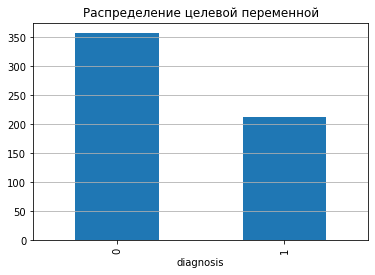

In [31]:
good_data['diagnosis'].value_counts(normalize=True)
good_data['diagnosis'].value_counts().plot.bar(figsize=(6, 4))
plt.title('Распределение целевой переменной')
plt.grid(axis='y')

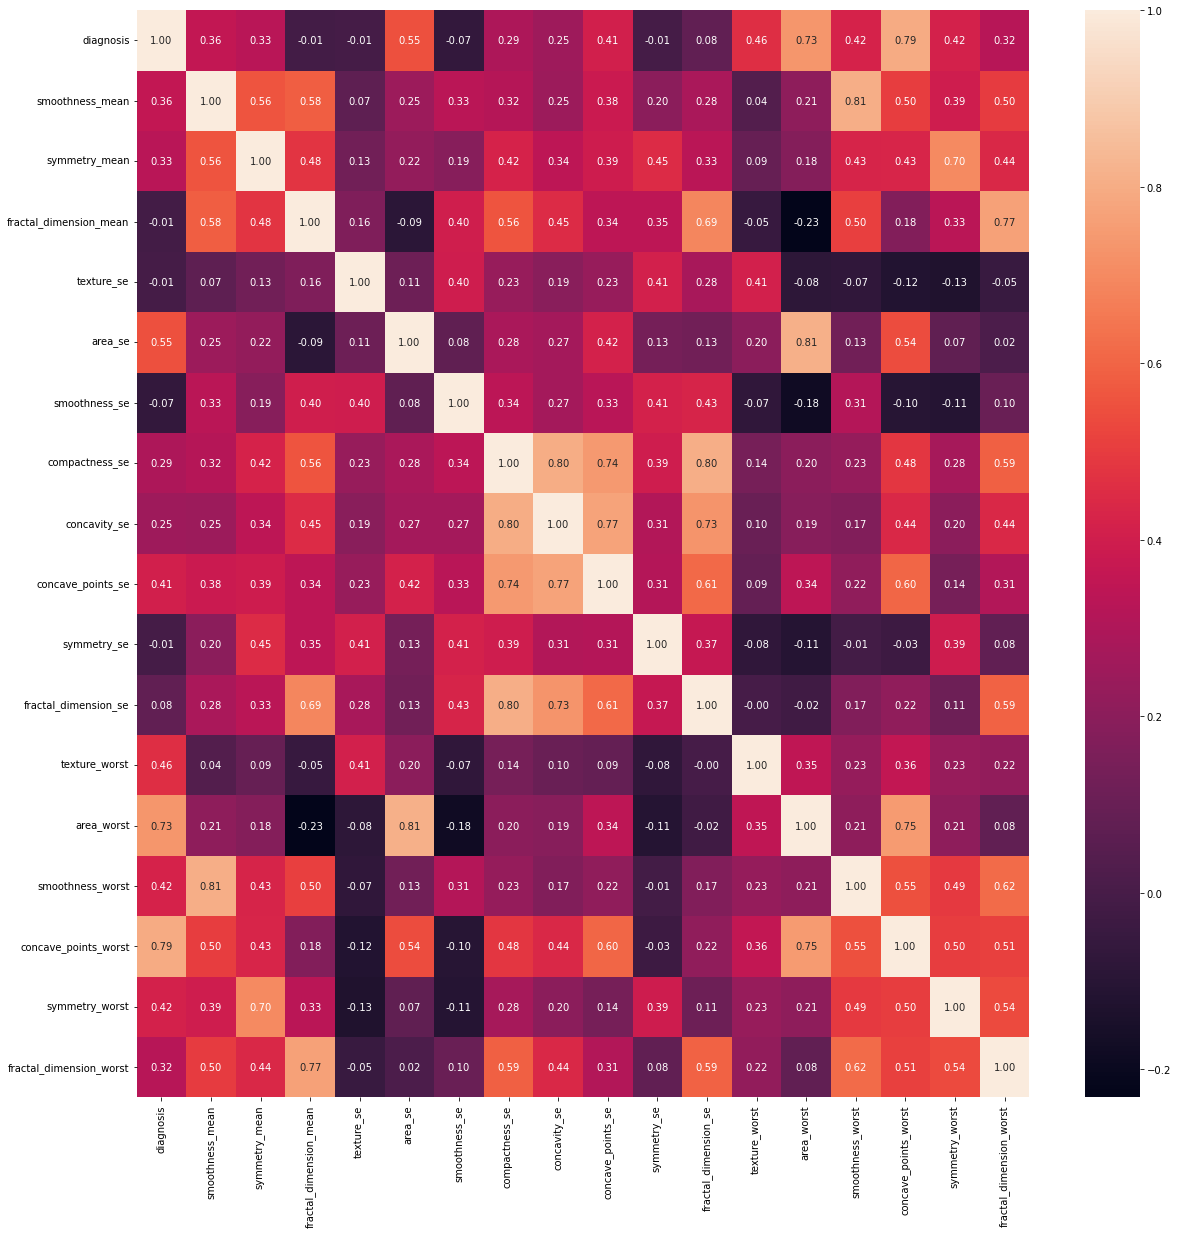

In [32]:
plt.figure(figsize=(20, 20))
sns.heatmap(good_data.corr(), annot=True, fmt='.2f') 
plt.show()  

#### Разделяем данные на тренировочные и тестовые   

In [33]:
# Разделяем данные на тренировочные и тестовые     
X_train, X_test, y_train, y_test = train_test_split(good_data.drop(['diagnosis'], axis=1),
                                                    good_data['diagnosis'],
                                                    test_size=0.3,
                                                    random_state=123,
                                                    stratify=good_data['diagnosis']
)

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### KNN с подбором параметров

In [35]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

print("Train quality:")
quality_report(knn.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(knn.predict(X_test_scaled), y_test)

Train quality:
Accuracy: 0.9774
Precision: 0.9392
Recall: 1.0000
f1_score: 0.9686

Test quality:
Accuracy: 0.9298
Precision: 0.8906
Recall: 0.9194
f1_score: 0.9048


##### LogisticRegression "из коробки" без настройки параметров

In [36]:
log_reg = LogisticRegression()

log_reg.fit(X_train_scaled, y_train)
print("Train quality:")
quality_report(log_reg.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(log_reg.predict(X_test_scaled), y_test)

probas = log_reg.predict_proba(X_test_scaled)[:,1]

Train quality:
Accuracy: 0.9874
Precision: 0.9730
Recall: 0.9931
f1_score: 0.9829

Test quality:
Accuracy: 0.9591
Precision: 0.9375
Recall: 0.9524
f1_score: 0.9449


ROC-AUC  0.98642


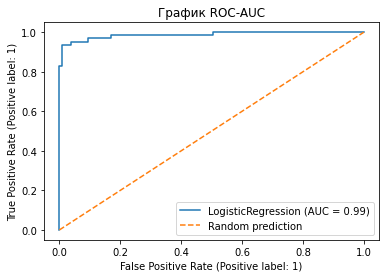

In [37]:
print('ROC-AUC ', round(roc_auc_score(y_test, probas),5))

RocCurveDisplay.from_estimator(log_reg, X_test_scaled, y_test);

plt.plot([0,1], [0,1], linestyle='dashed', label='Random prediction');
plt.title("График ROC-AUC")
plt.legend()
plt.show()

##### Выводы

##### LogisticRegression 'из коробки'
f1 = 0.9449

##### KNN (neighbors = 3)
f1_score: 0.9048

Значение метрик у LogisticRegression лучше, чем у KNN с подбором параметров.
##### LogisticRegression работает лучше KNN.

#### Влияние коэффициентов на целевую переменную.

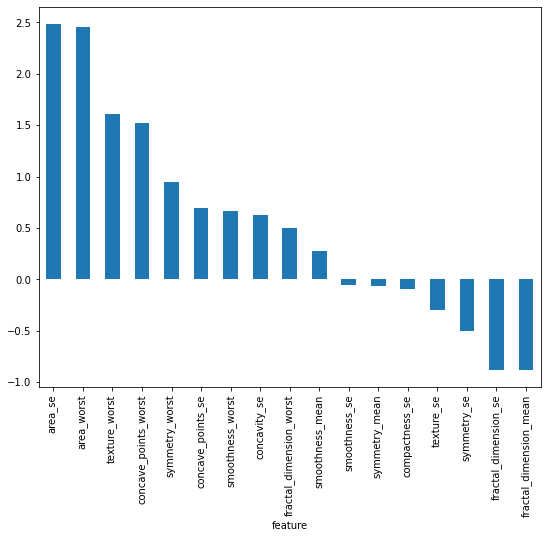

In [38]:
featureImportance = pd.DataFrame({"feature": good_data.drop('diagnosis',axis=1).columns, 
                                  "importance": log_reg.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot.bar(figsize=(9, 7));

Оценки коэффициэнтов говорят о влиянии признаков на вероятность наличия болезни.

- Чем больше признак area_se, тем больше вероятность того, что у человека новообразование будет злокачественным. 
- Чем меньше значение признака fractal_dimension_mean, тем меньше вероятность того, что у человека новообразование будет злокачественным.

#### Распределение предсказанных  вероятностей по KNN и LogisticRegression

In [39]:
log_reg.predict_proba(X_test_scaled)[:5]

array([[9.77287138e-01, 2.27128615e-02],
       [9.99910849e-01, 8.91510159e-05],
       [9.99201028e-01, 7.98971669e-04],
       [9.94491758e-01, 5.50824166e-03],
       [5.06631765e-06, 9.99994934e-01]])

In [40]:
log_reg.predict(X_test_scaled)[:5]

array([0, 0, 0, 0, 1])

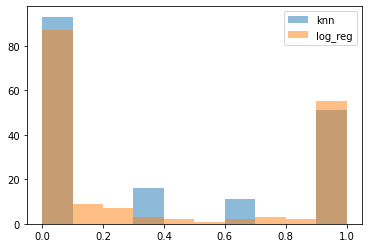

In [41]:
plt.hist(knn.predict_proba(X_test_scaled)[:, 1], alpha=0.5, label='knn');
plt.hist(log_reg.predict_proba(X_test_scaled)[:, 1], alpha=0.5, label='log_reg');
plt.legend();

Значения вероятностей близкие к 0 и 1 выше, чем промежуточные значения вероятностей, вероятность 0.5 минимальная.

#### L2 Ridge

In [42]:
parameters = {'C': [0.001, 0.01, 0.1, 1]}

log_reg = LogisticRegression(penalty = 'l2')
clf = GridSearchCV(log_reg, parameters, scoring = 'f1', cv = 23)
clf.fit(data.drop(['diagnosis'], axis=1), good_data['diagnosis'])

GridSearchCV(cv=23, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1]}, scoring='f1')

In [43]:
pd.DataFrame(clf.cv_results_)[['param_C','mean_test_score']]

,param_C,mean_test_score
0,0.001,0.908557
1,0.01,0.899717
2,0.1,0.917945
3,1,0.918549


In [44]:
print('Best C:', clf.best_params_, '\t Best score: ',clf.best_score_)

Best C: {'C': 1} 	 Best score:  0.9185488764537088


    При добавлении регуляризации L2 Ridge метрика модели LogisticRegression F1=0.9185.

### L1 Lasso

In [45]:
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

log_reg = LogisticRegression(solver = 'liblinear', penalty = 'l1')
clf = GridSearchCV(log_reg, parameters, scoring = 'f1', cv = 23)
clf.fit(data.drop(['diagnosis'], axis=1), good_data['diagnosis'])


GridSearchCV(cv=23,
             estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]}, scoring='f1')

In [46]:
pd.DataFrame(clf.cv_results_)[['param_C','mean_test_score']]

,param_C,mean_test_score
0,0.001,0.873284
1,0.01,0.884126
2,0.1,0.904730
3,1,0.930354
4,10,0.948707
5,100,0.953317


In [47]:
print('Best C:', clf.best_params_, '\t Best score: ',clf.best_score_)

Best C: {'C': 100} 	 Best score:  0.9533173979667449


    При добавлении регуляризации L1 Lasso метрика модели LogisticRegression стала ещё лучше F1=0.9533.

#### Выводы 
У настроенных моделей:
- LogisticRegression  F1 = 0.9533.
- KNN  F1 = 0.9076.

#### Модель LogisticRegression работает лучше, чем KNN.